# CH07_2_Generating_Neural_Network_using_Tensorflow_and_Keras

- Last update : 2022.04.11.

## # Import Packages and dataset and splitting dataset into two

In [60]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split

# lading the dataset 

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# check out size of dataset 
print(">>> x_train_all.shape/ y_train_all.shape =", x_train_all.shape,'/', y_train_all.shape)

# Spliting training set and verification set equally

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all, test_size=0.2, random_state=42)

print(">>> x_train.shape/ y_train.shape =", x_train.shape,'/', y_train.shape)
print(">>> x_val/ y_val =", x_val.shape,'/', y_val.shape)

# ---------------------------------------------
# Regularization of Input dataset
# ---------------------------------------------
x_train = x_train / 255
x_val = x_val / 255

# ---------------------------------------------
# Change the dimensions of training set and verification set
# ---------------------------------------------
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)
print ("----------------------------------------------------------------")
print (">>> x_train.shape/ x_val.shape =", x_train.shape,'/', x_val.shape)

>>> x_train_all.shape/ y_train_all.shape = (60000, 28, 28) / (60000,)
>>> x_train.shape/ y_train.shape = (48000, 28, 28) / (48000,)
>>> x_val/ y_val = (12000, 28, 28) / (12000,)
----------------------------------------------------------------
>>> x_train.shape/ x_val.shape = (48000, 784) / (12000, 784)


 ## # Prepare Target dataset to Train MultiLayered Classfication Neural Newtwork

In [53]:
# 1. Convert the target into one-hot incoding 
# 2. comparing the each element with output of neuron 
# 3. one-hot incoding using to_categorical function 

tf.keras.utils.to_categorical([0, 1, 3])

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

print (y_train_encoded.shape, y_val_encoded.shape)

(48000, 10) (12000, 10)


## # Generating Neural Network using Tensorflow

In [17]:
# Define weight variables for training 
w = tf.Variable(tf.zeros(shape=(1)))
b = tf.Variable(tf.zeros(shape=(1)))

print (">>> w =", w)
print (">>> b =", b)

# Setting Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(lr = 0.01)

# Training epoch times 
num_epochs = 10
for step in range(num_epochs): 
    
    # Recording calculation process for automatic differentiation. 
    with tf.GradientTape() as tape:
        z_net = w * x_train + b
        z_net = tf.reshape(z_net, [-1])    
        sqr_errors = tf.square(y_train - z_net)
        mean_cost = tf.reduce_mean(sqr_errors)
    
    # Calculating weight gredient for loss function 
    grads = tape.gradient(mean_cost, [w, b])
    
    # Reflecting Gradient on Optimizer 
    optimizer.apply_gradients(zip(grads, [w, b]))

>>> w = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
>>> b = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


InvalidArgumentError: Incompatible shapes: [48000] vs. [37632000] [Op:Sub]

## # Generating Neural Network using Keras

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Gererating Neural Network
model = tf.keras.models.Sequential()

# Adding Full Connection Layer 
model.add(tf.keras.layers.Dense(1))

# Designating Optimizer and loss function 
model.compile(optimizer='sgd', loss='mse')

# Training the routine epoch times using training dataset 
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 1s 396us/step - loss: nan
Epoch 2/10
1500/1500 [==============================] - 1s 397us/step - loss: nan
Epoch 3/10
1500/1500 [==============================] - 1s 394us/step - loss: nan
Epoch 4/10
1500/1500 [==============================] - 1s 395us/step - loss: nan
Epoch 5/10
1500/1500 [==============================] - 1s 393us/step - loss: nan
Epoch 6/10
1500/1500 [==============================] - 1s 394us/step - loss: nan
Epoch 7/10
1500/1500 [==============================] - 1s 394us/step - loss: nan
Epoch 8/10
1500/1500 [==============================] - 1s 396us/step - loss: nan
Epoch 9/10
1500/1500 [==============================] - 1s 393us/step - loss: nan
Epoch 10/10
1500/1500 [==============================] - 1s 392us/step - loss: nan


## # Sequential class use case 

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential([Dense(100, activation='sigmoid'),Dense(100, activation='sigmoid')])

## # Dense class use case 

In [30]:
# 1. unit : parameter to designate the no. of neuron
# 2. activation : parameter to designate the activation function 

Dense(100, activation='sigmoid')

## # Model's optimization algorithm and loss function setting 

In [32]:
# 1. optimizer : parameter to designate optimization algorithm
# 2. loss : parameter to designate loss function 

model.compile(optimizer='sgd', loss='categorical_crossentropy')

## # Model training and prediction 

In [ ]:
model = Sequential()
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X, y, epochs= ...)
model.predict(X)
model.evaluate(X, y)

## # Generating MultiLayered Neural Network using Keras 

In [70]:
# 1. Model generation 

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()

In [71]:
# 2. adding hidden layer and output layer in Model 

model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [72]:
# 3. designating optimization algorithms and loss function 

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
# 4. model training 

history = model.fit(x_train, y_train_encoded, epochs=40, 
                   validation_data=(x_val, y_val_encoded))

Epoch 1/40
1500/1500 [==============================] - 1s 819us/step - loss: 1.3833 - accuracy: 0.6396 - val_loss: 0.9590 - val_accuracy: 0.7318
Epoch 2/40
1500/1500 [==============================] - 1s 793us/step - loss: 0.8413 - accuracy: 0.7405 - val_loss: 0.7508 - val_accuracy: 0.7573
Epoch 3/40
1500/1500 [==============================] - 1s 787us/step - loss: 0.7126 - accuracy: 0.7616 - val_loss: 0.6653 - val_accuracy: 0.7750
Epoch 4/40
1500/1500 [==============================] - 1s 788us/step - loss: 0.6491 - accuracy: 0.7764 - val_loss: 0.6151 - val_accuracy: 0.7895
Epoch 5/40
1500/1500 [==============================] - 1s 809us/step - loss: 0.6080 - accuracy: 0.7896 - val_loss: 0.5823 - val_accuracy: 0.7992
Epoch 6/40
1500/1500 [==============================] - 1s 785us/step - loss: 0.5779 - accuracy: 0.8005 - val_loss: 0.5543 - val_accuracy: 0.8066
Epoch 7/40
1500/1500 [==============================] - 1s 796us/step - loss: 0.5548 - accuracy: 0.8078 - val_loss: 0.5329 -

In [74]:
# 5. plotting graph for loss and accuracy 

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


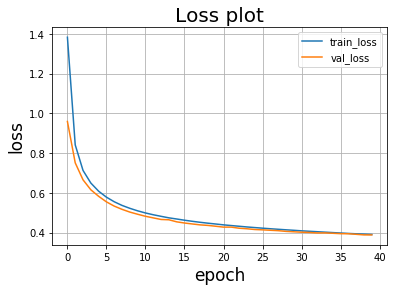

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize ='17')
plt.xlabel('epoch', fontsize ='17')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss plot', fontsize ='20')

plt.grid()
plt.show()

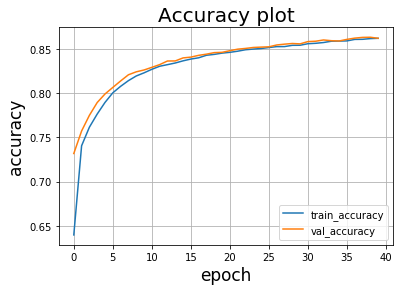

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy', fontsize ='17')
plt.xlabel('epoch', fontsize ='17')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.title('Accuracy plot', fontsize ='20')

plt.grid()
plt.show()

In [77]:
# 6. Calculating verification set accuracy

loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose = 0)
print(accuracy)

0.8622499704360962
